#load the libraries


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

#Load the Dataset

In [35]:
 from google.colab import drive

In [36]:
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
data =pd.read_csv('/content/drive/MyDrive/Maternal Health Risk Data Set.csv')

In [38]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


#Univarient analysis


<Axes: xlabel='BS', ylabel='Count'>

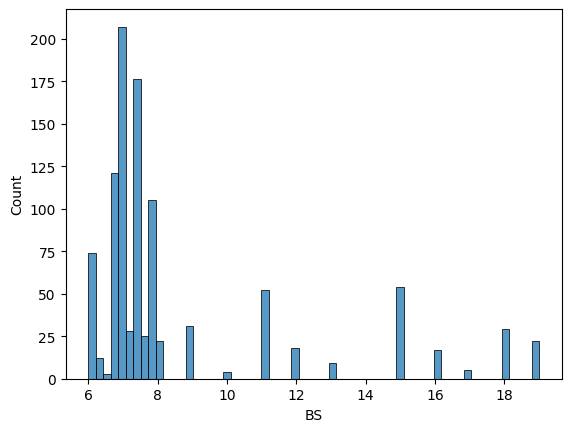

In [6]:
sns.histplot(data['BS'])

In [39]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


#Bivarient analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '70'),
  Text(1, 0, '75'),
  Text(2, 0, '76'),
  Text(3, 0, '78'),
  Text(4, 0, '80'),
  Text(5, 0, '83'),
  Text(6, 0, '85'),
  Text(7, 0, '90'),
  Text(8, 0, '95'),
  Text(9, 0, '99'),
  Text(10, 0, '100'),
  Text(11, 0, '110'),
  Text(12, 0, '115'),
  Text(13, 0, '120'),
  Text(14, 0, '129'),
  Text(15, 0, '130'),
  Text(16, 0, '135'),
  Text(17, 0, '140'),
  Text(18, 0, '160')])

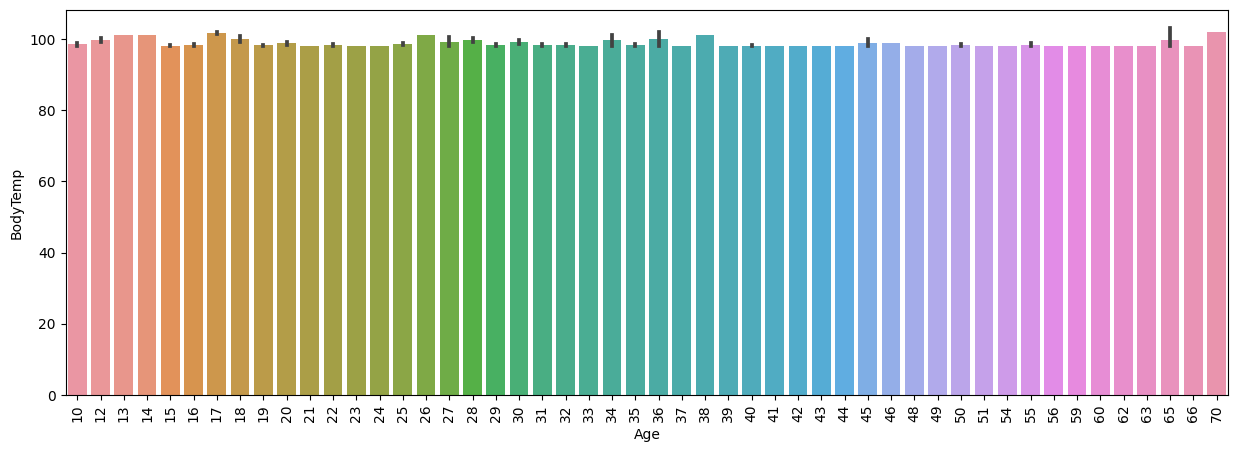

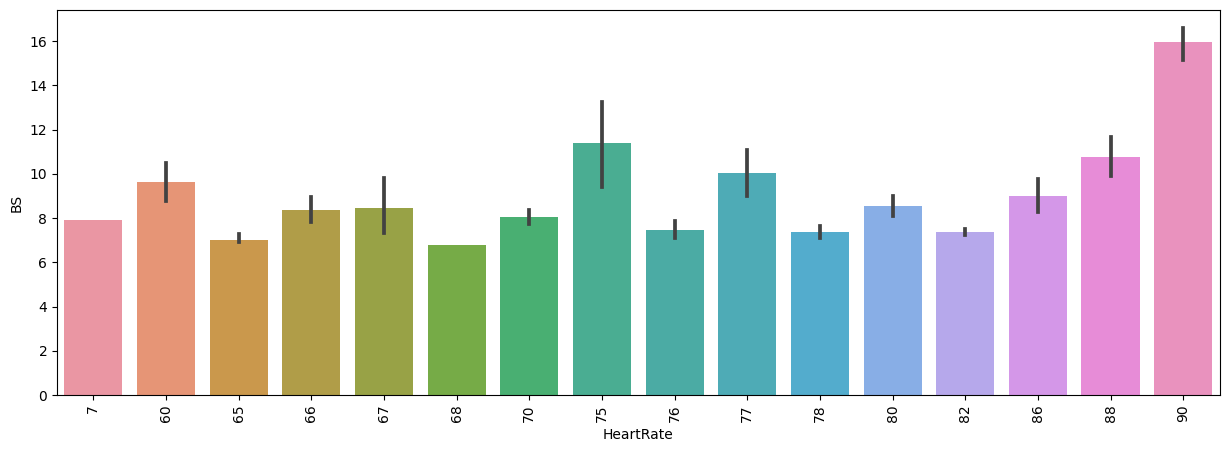

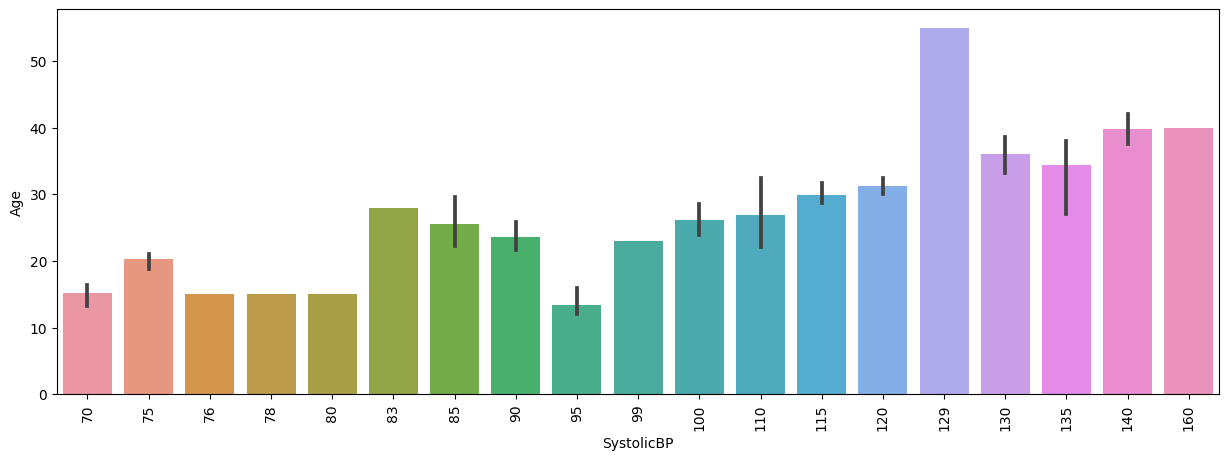

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

sns.barplot(x=data['Age'], y=data['BodyTemp'])
plt.xticks(rotation=90)

plt.figure(figsize=(15, 5)) 

sns.barplot(x=data['HeartRate'], y=data['BS'])
plt.xticks(rotation=90)

plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)

sns.barplot(x=data['SystolicBP'], y=data['Age'])
plt.xticks(rotation=90)

#mutivarirnt analysis

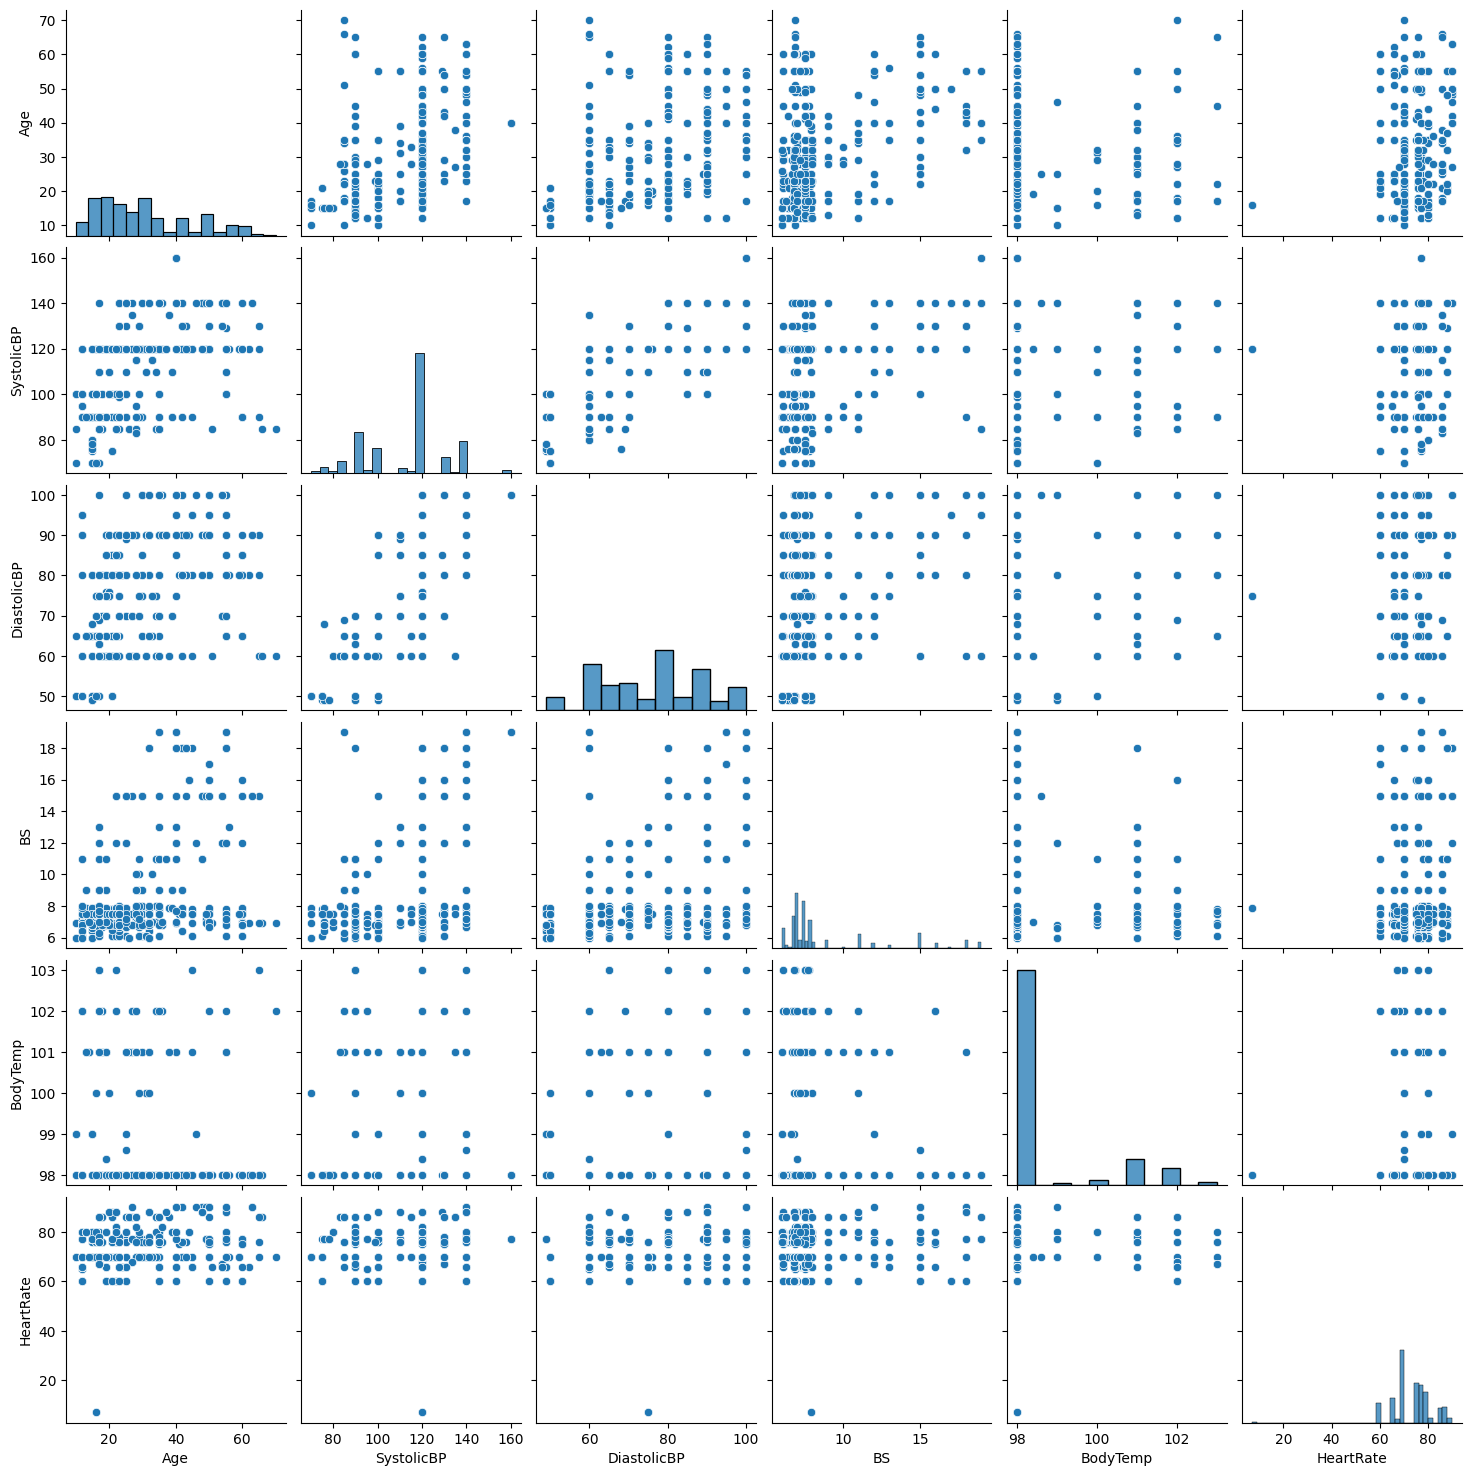

In [9]:
sns.pairplot(data)

# Handling missing values 


In [40]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [41]:
df=pd.read_csv('/content/drive/MyDrive/Maternal Health Risk Data Set.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [42]:
print(" number missing the value each column:")
print(data.isnull().sum())

data = data.dropna ()

data= data.fillna(0)

data = data.fillna (data.mean())

data = data.fillna(data.mode().iloc[0])

data= data.fillna (data.median())

data.to_csv('cleaned_data.csv', index=False)

 number missing the value each column:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [13]:
data=data.fillna(data.mean())

In [14]:
data=data.fillna(data.median())


In [15]:
data=pd.read_csv('cleaned_data.csv')


#Handling categorical data

In [16]:
data.info

<bound method DataFrame.info of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]>

In [43]:
from sklearn.preprocessing import LabelEncoder

# Example dataset with categorical variable
dataset = ['SystolicBP', 'DIstolicBP', 'BS', 'BodyTemp', 'HeartRate',]

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical variable
encoded_data = label_encoder.fit_transform(dataset)

print(encoded_data)


[4 2 0 1 3]



#Handling outliers


In [18]:
import numpy as np
from scipy import stats

def find_outliers(data):
    
    z_scores = np.abs(stats.zscore(data))

    
    threshold = 3

    
    outlier_indices = np.where(z_scores > threshold)[0]

    return outlier_indices


data = [2, 4, 5, 7, 8, 10, 12, 14, 15, 100]
outlier_indices = find_outliers(data)

print("Outlier indices:", outlier_indices)

Outlier indices: []


In [19]:
def remove_outliers(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    filtered_data = data[z_scores < threshold]
    return filtered_data

dataset = [1, 2, 3, 4, 5, 'A', 6, 7, 8, 9, 10]  


numeric_data = np.array([x for x in dataset if isinstance(x, (int, float))])


filtered_data = remove_outliers(numeric_data)

print(filtered_data)

[ 1  2  3  4  5  6  7  8  9 10]


#Scaling Techniques


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Example dataset
dataset = [1, 2, 3, 4, 5]

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the dataset
scaled_data = scaler.fit_transform(np.array(dataset).reshape(-1, 1))

print(scaled_data)


[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]



#Splitting dataset into training and test set


In [21]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Maternal Health Risk Data Set.csv')

# Display information about the dataset
print(data.info())

# Split the dataset into a training set
train_set = data.sample(frac=0.8, random_state=42)  # 80% of the data for training

# Display the information about the training set
print(train_set.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 752 to 645
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          811 non-null    int64  
 1   SystolicBP   811 non-null    int64  
 2   DiastolicBP  811 non-null    int64  
 3   BS           811 non-null    float64
 4   BodyTemp     811 non-null    float64
 5   HeartRate    811 non-null    int64  
 6   R

In [22]:
data.shape

(1014, 7)

In [23]:
data.info

<bound method DataFrame.info of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]>

In [24]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

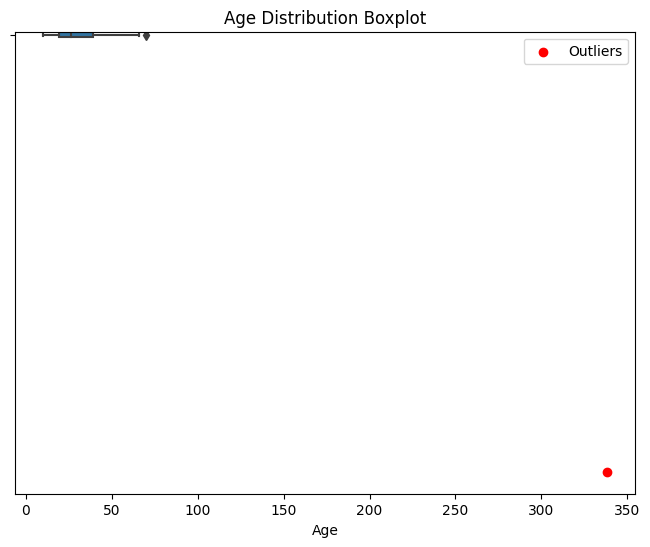

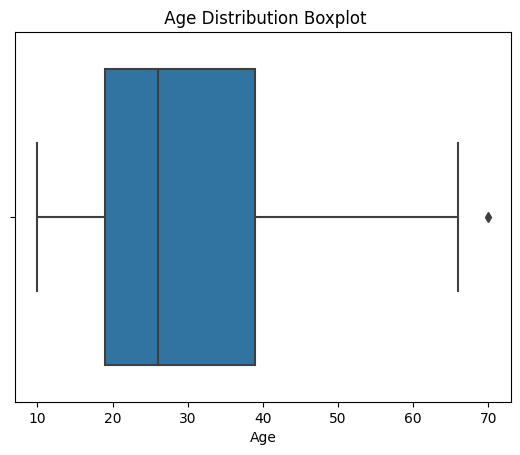

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'Age'  
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x=col)
plt.title(f"{col} Distribution Boxplot")

outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
plt.scatter(x=outliers.index, y=outliers[col], color='red', label='Outliers')
plt.legend()
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Age'])
plt.xlabel('Age')
plt.title(' Age Distribution Boxplot')
plt.show()



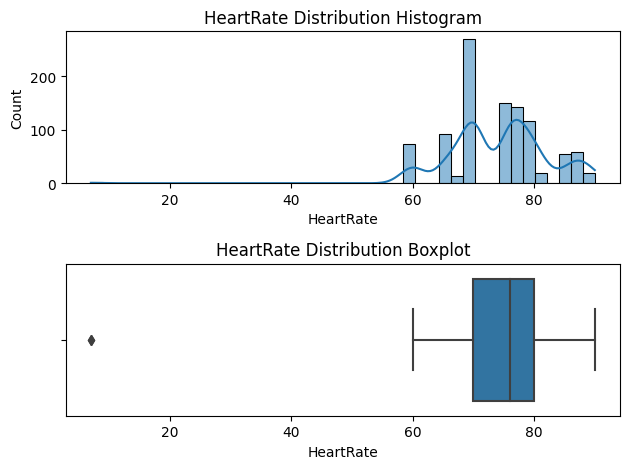

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called "data" and "col" is the column name you want to plot
col= 'HeartRate'
# Create the subplots
fig, ax = plt.subplots(2)

# Plot the histogram on the first subplot
sns.histplot(data=data, x=col, kde=True, ax=ax[0])
ax[0].set_title(f"{col} Distribution Histogram")

# Plot the boxplot on the second subplot
sns.boxplot(data=data, x=col, ax=ax[1])
ax[1].set_title(f"{col} Distribution Boxplot")

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


In [27]:
data=data.drop(data.index[data.HeartRate==7])

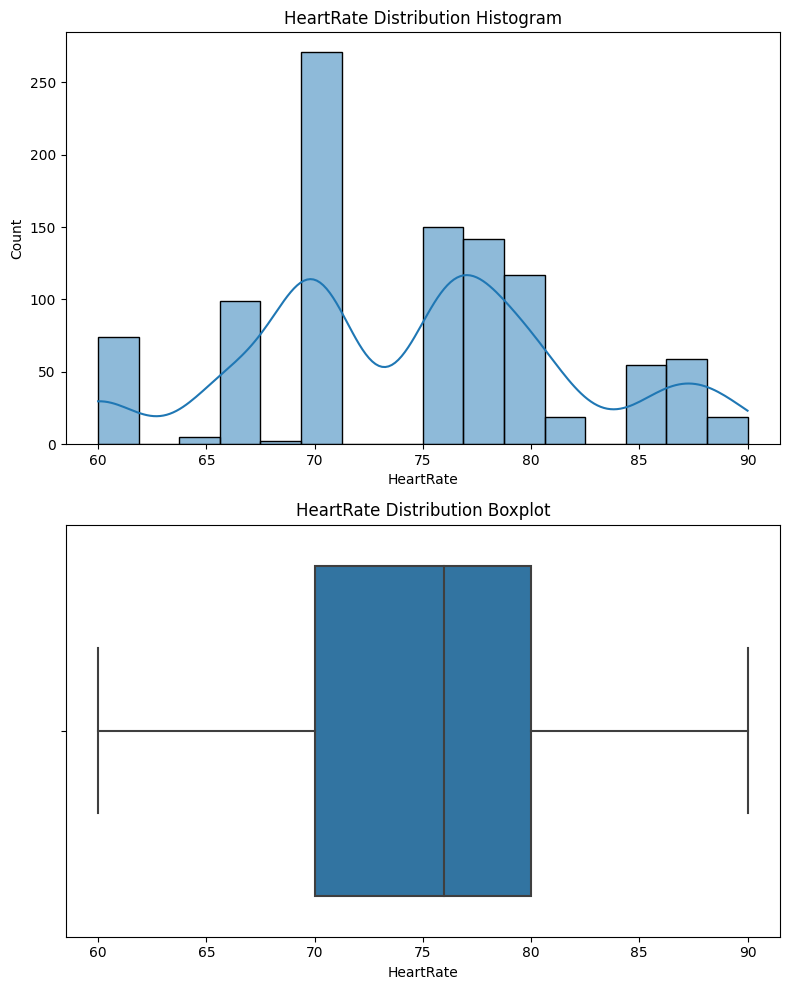

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called "data" and "col" is the column name you want to plot
col = 'HeartRate'
# Create the subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Create a histogram with kernel density estimation
sns.histplot(data=data, x=col, kde=True, ax=ax[0])
ax[0].set_title(f"{col} Distribution Histogram")

# Create a boxplot
sns.boxplot(data=data, x=col, ax=ax[1])
ax[1].set_title(f"{col} Distribution Boxplot")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


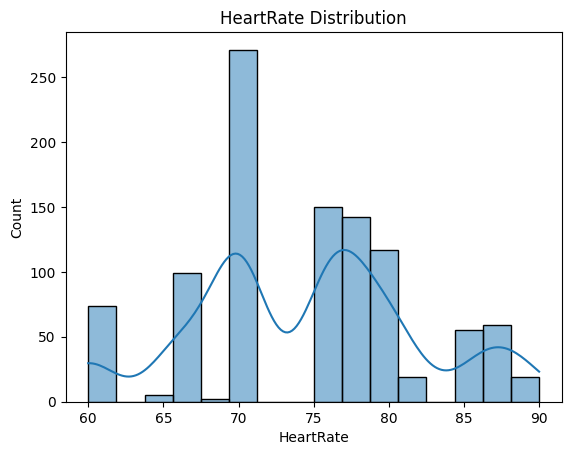

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def num_plot(data, column):
    # Create a histogram with kernel density estimation
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f"{column} Distribution")
    plt.show()

# Assuming you have a DataFrame called "data" and you want to plot the "HeartRate" column
num_plot(data, "HeartRate")
